In [43]:
import pandas as pd

df = pd.read_csv('df_v2.csv')

In [45]:
df_backup = df

# Eliminar las columnas que no me van a servir al análisis porque tienen muchos datos vacíos
eliminar = ['URL', 'Ubicación', 'Precio ARS', 'Expensas', 'Ambientes', 'Cocheras','Sup. terreno [m²]']

df = df.drop(eliminar, axis=1)


In [54]:
# Rellenamos los valores nulos con la media de cada columna vacia


df['Sup. cubierta [m²]'] = df['Sup. cubierta [m²]'].fillna(df['Sup. cubierta [m²]'].mean())


df['Antiguedad [años]'] = df['Antiguedad [años]'].fillna(df['Antiguedad [años]'].mean())

df['Dormitorios'] = df['Dormitorios'].fillna(df['Dormitorios'].mean())


In [57]:
# Codificamos la columna Estado

df = pd.get_dummies(df, columns=['Estado'])

df

,Precio USD,Sup. cubierta [m²],Dormitorios,Baños,Antiguedad [años],Estado_A Refaccionar,Estado_Bueno,Estado_Excelente,Estado_Muy Bueno,Estado_Regular
0,1400.000000,160.000000,3.000000,2.0,17.725936,0,1,0,0,0
1,1000.000000,167.431799,2.000000,2.0,14.000000,0,1,0,0,0
2,1100.000000,76.000000,2.000000,2.0,11.000000,0,0,0,1,0
3,250.000000,35.000000,2.677231,1.0,40.000000,0,1,0,0,0
4,4000.000000,330.000000,4.000000,2.0,0.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7729,236.363636,250.000000,3.000000,2.0,50.000000,0,1,0,0,0
7730,236.363636,3.000000,2.000000,2.0,30.000000,0,1,0,0,0
7731,118.181818,160.000000,3.000000,2.0,0.000000,0,1,0,0,0
7732,72.727273,35.000000,2.677231,1.0,55.000000,0,1,0,0,0


In [58]:
# Vamos a empezar a entrenar un modelo para ir viendo que onda

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Features (variables independientes)
X = df.drop('Precio USD', axis=1)

# Target (variable dependiente)
y = df['Precio USD']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")



Error Cuadrático Medio (MSE): 893009156.5322489


In [73]:
# Ejemplo 
new_data = [[160, 3, 2, 17, 0, 1, 0, 0, 0]]

predecir_precio = model.predict(new_data)
print(f"Precio predicho: ${predecir_precio[0]:,.2f} USD")

Precio predicho: $2,212.31 USD


/home/pablo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
df.corr()

,Precio USD,Sup. cubierta [m²],Dormitorios,Baños,Antiguedad [años],Estado_A Refaccionar,Estado_Bueno,Estado_Excelente,Estado_Muy Bueno,Estado_Regular
Precio USD,1.000000,0.101801,0.072592,0.068251,-0.003369,-0.002686,0.019766,-0.008140,-0.019336,-0.001041
Sup. cubierta [m²],0.101801,1.000000,0.659589,0.690772,-0.005942,0.002475,-0.004125,0.026721,-0.028893,0.000623
Dormitorios,0.072592,0.659589,1.000000,0.702328,0.070944,0.035740,-0.013522,0.017221,-0.005983,0.008961
Baños,0.068251,0.690772,0.702328,1.000000,-0.041042,-0.004460,-0.066754,0.092286,-0.016839,-0.011918
Antiguedad [años],-0.003369,-0.005942,0.070944,-0.041042,1.000000,0.037007,0.006272,-0.091632,0.103989,0.031778
Estado_A Refaccionar,-0.002686,0.002475,0.035740,-0.004460,0.037007,1.000000,-0.047565,-0.012409,-0.008693,-0.000634
Estado_Bueno,0.019766,-0.004125,-0.013522,-0.066754,0.006272,-0.047565,1.000000,-0.760209,-0.532564,-0.038831
Estado_Excelente,-0.008140,0.026721,0.017221,0.092286,-0.091632,-0.012409,-0.760209,1.000000,-0.138938,-0.010130
Estado_Muy Bueno,-0.019336,-0.028893,-0.005983,-0.016839,0.103989,-0.008693,-0.532564,-0.138938,1.000000,-0.007097
Estado_Regular,-0.001041,0.000623,0.008961,-0.011918,0.031778,-0.000634,-0.038831,-0.010130,-0.007097,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

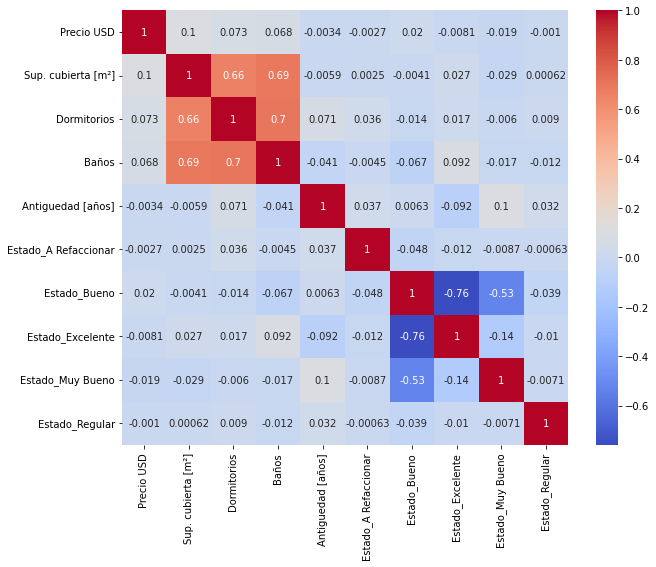

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

plt.show

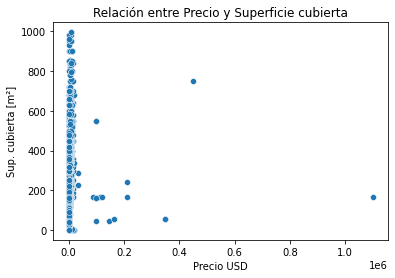

In [78]:
sns.scatterplot(x='Precio USD', y='Sup. cubierta [m²]', data=df)

plt.title('Relación entre Precio y Superficie cubierta')
plt.xlabel('Precio USD')
plt.ylabel('Sup. cubierta [m²]')

plt.show()

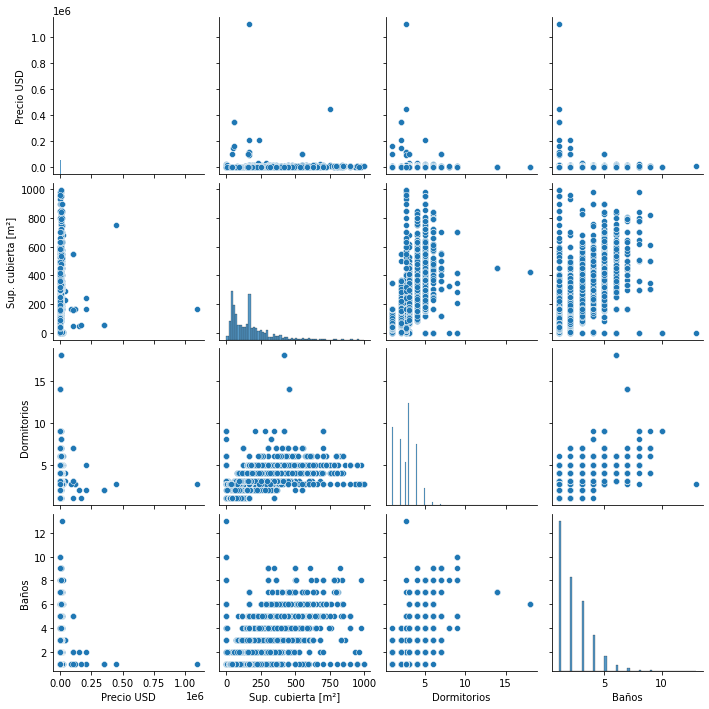

In [79]:
# Visualizar scatter plots entre varias variables
sns.pairplot(df, vars=['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños'])
plt.show()


In [88]:
# Convertir la columna "Precio USD" a tipo entero
df['Precio USD'] = df['Precio USD'].astype(int)



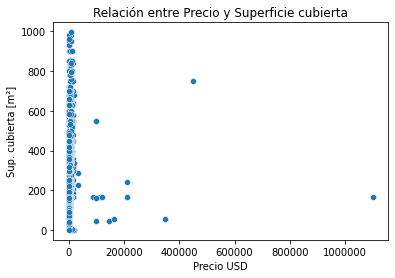

In [95]:

# Tu código para el gráfico
sns.scatterplot(x='Precio USD', y='Sup. cubierta [m²]', data=df)
plt.title('Relación entre Precio y Superficie cubierta')
plt.xlabel('Precio USD')
plt.ylabel('Sup. cubierta [m²]')

# Ajustar la notación del eje x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [103]:
# Calcular Q1, Q3 y IQR
Q1 = df['Precio USD'].quantile(0.25)
Q3 = df['Precio USD'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_filtrado = df[(df['Precio USD'] >= Q1 - 1.5 * IQR) & (df['Precio USD'] <= Q3 + 1.5 * IQR)]

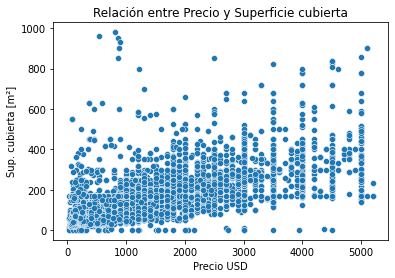

In [105]:
sns.scatterplot(x='Precio USD', y='Sup. cubierta [m²]', data=df_filtrado)
plt.title('Relación entre Precio y Superficie cubierta')
plt.xlabel('Precio USD')
plt.ylabel('Sup. cubierta [m²]')

# Ajustar la notación del eje x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [111]:
# Calcular Q1, Q3 y IQR
Q1 = df_filtrado['Sup. cubierta [m²]'].quantile(0.25)
Q3 = df_filtrado['Sup. cubierta [m²]'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_filtrado_2 = df_filtrado[(df_filtrado['Precio USD'] >= Q1 - 1.5 * IQR) & (df_filtrado['Sup. cubierta [m²]'] <= Q3 + 1.5 * IQR)]

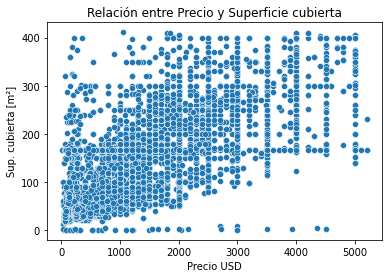

In [115]:
sns.scatterplot(x='Precio USD', y='Sup. cubierta [m²]', data=df_filtrado_2)
plt.title('Relación entre Precio y Superficie cubierta')
plt.xlabel('Precio USD')
plt.ylabel('Sup. cubierta [m²]')

# Ajustar la notación del eje x
plt.ticklabel_format(style='plain', axis='x')

plt.show()

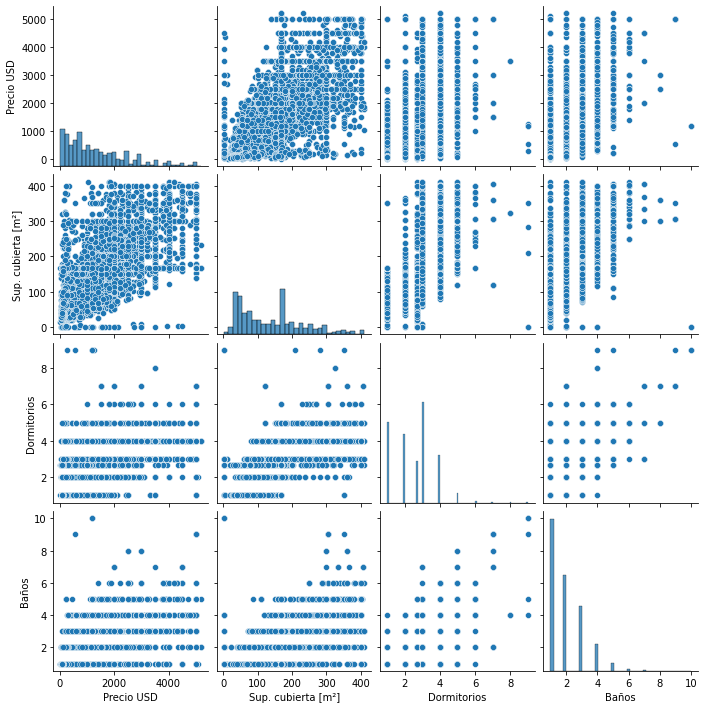

In [117]:
# Visualizar scatter plots entre varias variables
sns.pairplot(df_filtrado_2, vars=['Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños'])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

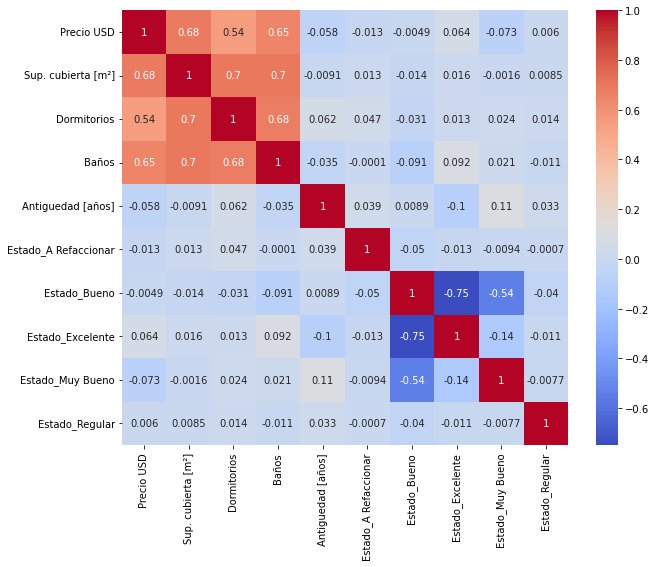

In [119]:
correlacion = df_filtrado_2.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

plt.show

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Features (variables independientes)
X = df_filtrado_2.drop('Precio USD', axis=1)

# Target (variable dependiente)
y = df_filtrado_2['Precio USD']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")

Error Cuadrático Medio (MSE): 656069.0779854576


In [139]:
# Ejemplo 
new_data = [[160, 3, 2, 17, 0, 1, 0, 0, 0]]

predecir_precio = model.predict(new_data)
print(f"Precio predicho: ${predecir_precio[0]:,.2f} USD")

Precio predicho: $1,482.25 USD


/home/pablo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [131]:
# Redondear y convertir la columna Dormitorios a entero
df_filtrado_2['Dormitorios'] = df_filtrado_2['Dormitorios'].round().astype(int)

# Redondear y convertir la columna Antiguedad [años] a entero
df_filtrado_2['Antiguedad [años]'] = df_filtrado_2['Antiguedad [años]'].round().astype(int)

df_filtrado_2


/tmp/ipykernel_159124/683842036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_2['Dormitorios'] = df_filtrado_2['Dormitorios'].round().astype(int)
/tmp/ipykernel_159124/683842036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_2['Antiguedad [años]'] = df_filtrado_2['Antiguedad [años]'].round().astype(int)


,Precio USD,Sup. cubierta [m²],Dormitorios,Baños,Antiguedad [años],Estado_A Refaccionar,Estado_Bueno,Estado_Excelente,Estado_Muy Bueno,Estado_Regular
0,1400,160.000000,3,2.0,18,0,1,0,0,0
1,1000,167.431799,2,2.0,14,0,1,0,0,0
2,1100,76.000000,2,2.0,11,0,0,0,1,0
3,250,35.000000,3,1.0,40,0,1,0,0,0
4,4000,330.000000,4,2.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7729,236,250.000000,3,2.0,50,0,1,0,0,0
7730,236,3.000000,2,2.0,30,0,1,0,0,0
7731,118,160.000000,3,2.0,0,0,1,0,0,0
7732,72,35.000000,3,1.0,55,0,1,0,0,0


In [137]:
df_filtrado_2['Antiguedad [años]'] = df_filtrado_2['Antiguedad [años]'].replace(0, 1)


/tmp/ipykernel_159124/478154395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_2['Antiguedad [años]'] = df_filtrado_2['Antiguedad [años]'].replace(0, 1)
